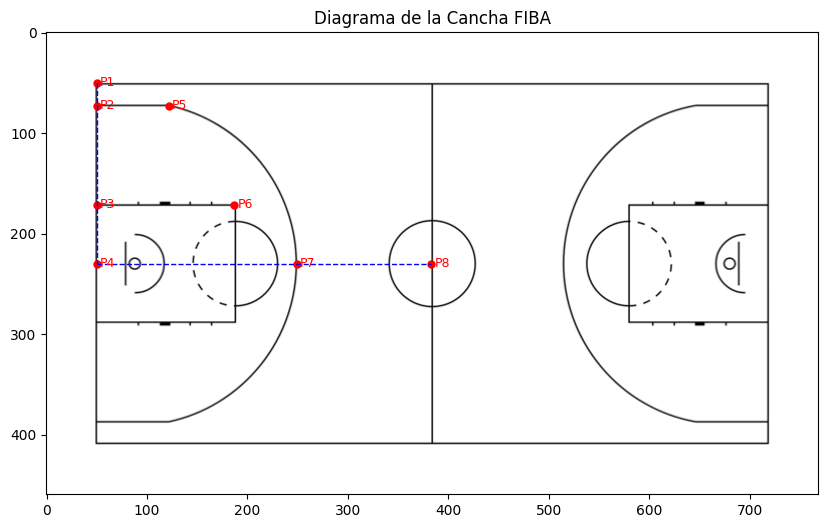

In [20]:
import matplotlib.pyplot as plt
from shapely.geometry import Point, Polygon
import numpy as np
import cv2

# Cargar la imagen de la cancha
img_path = "../court_diagrams/fiba_white_court_diagram.png"
court_img = cv2.imread(img_path)
court_img = cv2.cvtColor(court_img, cv2.COLOR_BGR2RGB)

# Dimensiones de la imagen y márgenes
img_width, img_height = 770, 460 
margen = 50


# Crear figura y ejes con Matplotlib
fig, ax = plt.subplots(figsize=(10, 6))
ax.imshow(court_img)
ax.set_title("Diagrama de la Cancha FIBA")


# Puntos de la línea vertical izquierda (x = 50):
P1 = (50, 50)    # Inicio del campo
P2 = (50, 73)    # Primera parte recta de la línea de triple
P3 = (50, 171)   # Inicio de la zona de 3 segundos
P4 = (50, 230)   # Eje horizontal de referencia (por ejemplo, línea media)

# Puntos en la línea horizontal superior:
P5 = (122, 73)   # Fin del tramo recto de la línea de triple (comienzo de la parte curva)
P6 = (187, 171)  # Fin del borde superior de la zona de 3 segundos
P7 = (249, 230)  # Centro o cénit del arco de la línea de triple
P8 = (383, 230)  # Punto en el eje horizontal (mitad del campo) para la zona de triple

# Visualizar los puntos sobre el diagrama
puntos = {'P1': P1, 'P2': P2, 'P3': P3, 'P4': P4, 'P5': P5, 'P6': P6, 'P7': P7, 'P8': P8}

for nombre, (x, y) in puntos.items():
    ax.plot(x, y, marker='o', markersize=5, color='red')
    ax.text(x+3, y+3, nombre, fontsize=9, color='red')

# Opcional: dibujar líneas que conecten algunos puntos para visualizar las zonas base
# Por ejemplo, dibujamos la línea vertical izquierda y la horizontal superior
ax.plot([50, 50], [50, 230], color='blue', linestyle='--', linewidth=1)
ax.plot([50, 383], [230, 230], color='blue', linestyle='--', linewidth=1)

plt.show()

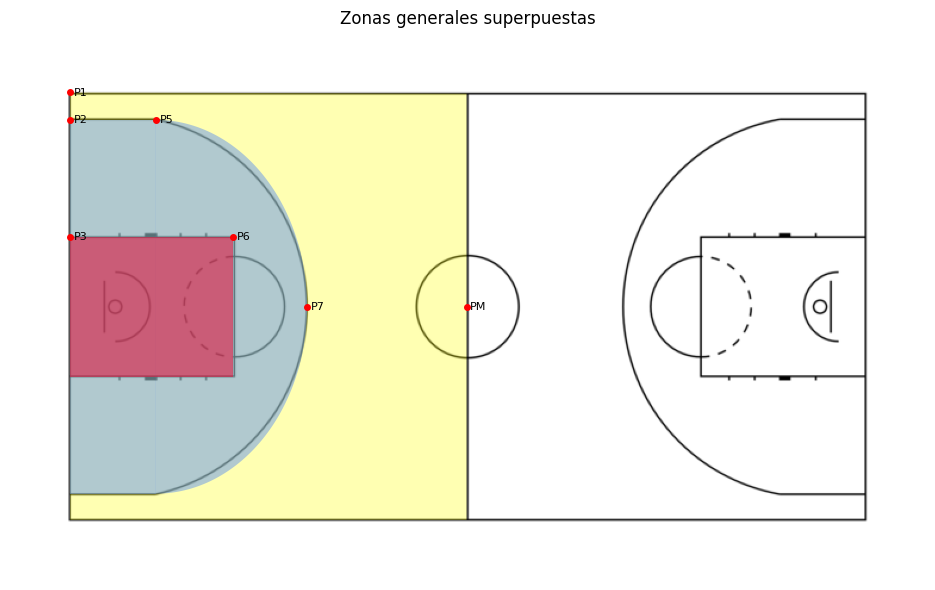

In [21]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as patches
from shapely.geometry import Polygon
from shapely.ops import unary_union

# Puntos de la línea vertical izquierda (x = 50):
P1 = (50, 50)    # Inicio del campo
P2 = (50, 73)    # Primera parte recta de la línea de triple
P3 = (50, 171)   # Inicio de la zona de 3 segundos
P4 = (50, 230)   # Eje horizontal de referencia (por ejemplo, línea media)

# Puntos en la línea horizontal superior:
P5 = (122, 73)   # Fin del tramo recto de la línea de triple (comienzo de la parte curva)
P6 = (187, 171)  # Fin del borde superior de la zona de 3 segundos
P7 = (249, 230)  # Centro o cénit del arco de la línea de triple
PM = (383, 230)  # Punto en el eje horizontal (mitad del campo) para la zona de triple

# Simetrías verticales respecto a yc = 230
def simetrico_y(p):
    return (p[0], 230 + (230 - p[1]))

P3s = simetrico_y(P3)
P5s = simetrico_y(P5)
P6s = simetrico_y(P6)
P2s = simetrico_y(P2)
P1s = simetrico_y(P1)

# ZONA MITAD DE CANCHA
zona_mitad = Polygon([P1, (383, 51), (383, 409), (50, 409)])

# ZONA DE 3 SEGUNDOS
zona_3segundos = Polygon([P3, P6, P6s, P3s])

# ZONA DE TRIPLE = zona_dos_interior + elipse

# ZONA DE 2 INTERIOR
zona_dos_interior = Polygon([P2, P5, P5s, P2s])

# MEDIA ELIPSE (triple frontal)
xc, yc = 122, 230
a = abs(P7[0] - xc)
b = abs(P5[1] - yc)
theta = np.linspace(-np.pi/2, np.pi/2, 200)
x_ellipse = xc + a * np.cos(theta)
y_ellipse = yc + b * np.sin(theta)
elipse_coords = np.column_stack((x_ellipse, y_ellipse))
elipse_shape = Polygon(elipse_coords)

zona_triple = unary_union([zona_dos_interior, elipse_shape])


# Mostrar visualmente
fig, ax = plt.subplots(figsize=(10, 6))
ax.imshow(court_img)

# Dibujar zonas con jerarquía: mitad > triple > 3 segundos
zona_patch_mitad = patches.Polygon(np.array(zona_mitad.exterior.coords), facecolor='yellow', alpha=0.3)
ax.add_patch(zona_patch_mitad)

for poly in zona_triple.geoms:
    zona_patch = patches.Polygon(np.array(poly.exterior.coords), facecolor='cornflowerblue', alpha=0.5)
    ax.add_patch(zona_patch)

zona_patch_3segundos = patches.Polygon(np.array(zona_3segundos.exterior.coords), facecolor='crimson', alpha=0.6)
ax.add_patch(zona_patch_3segundos)

# Dibujar puntos de referencia
puntos = {'P1': P1, 'P2': P2, 'P3': P3, 'P5': P5, 'P6': P6, 'P7': P7, 'PM': PM}
for nombre, (x, y) in puntos.items():
    ax.plot(x, y, 'ro', markersize=4)
    ax.text(x+3, y+3, nombre, fontsize=8, color='black')

plt.title("Zonas generales superpuestas")
plt.axis('off')
plt.tight_layout()
plt.show()

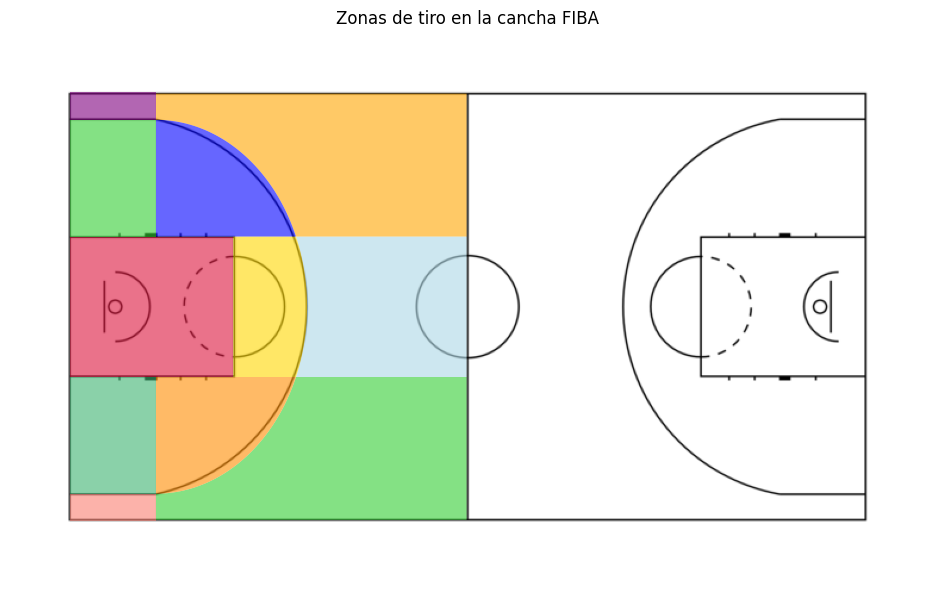

In [24]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as patches
from shapely.geometry import MultiPolygon, Polygon, box
from shapely.ops import unary_union
from PIL import Image

# Puntos base
P1 = (50, 50)
P2 = (50, 73)
P3 = (50, 171)
P4 = (50, 230)
P5 = (122, 73)
P6 = (187, 171)
P7 = (249, 230)
PM = (383, 230)

def simetrico_y(p):
    return (p[0], 230 + (230 - p[1]))

P3s = simetrico_y(P3)
P5s = simetrico_y(P5)
P6s = simetrico_y(P6)
P2s = simetrico_y(P2)
P1s = simetrico_y(P1)

# Zona de triple base
zona_dos_interior = Polygon([P2, P5, P5s, P2s])
xc, yc = 122, 230
a = abs(P7[0] - xc)
b = abs(P5[1] - yc)
theta = np.linspace(-np.pi/2, np.pi/2, 200)
x_ellipse = xc + a * np.cos(theta)
y_ellipse = yc + b * np.sin(theta)
elipse_coords = np.column_stack((x_ellipse, y_ellipse))
elipse_shape = Polygon(elipse_coords)
zona_triple = unary_union([zona_dos_interior, elipse_shape])

# Ya definidas anteriormente
zona_dos_up = Polygon([P2, P5, (P5[0], P3[1]), P3])
zona_dos_down = Polygon([simetrico_y(P2), simetrico_y(P5), (P5[0], simetrico_y(P3)[1]), simetrico_y(P3)])
zona_3segundos = Polygon([P3, P6, simetrico_y(P6), simetrico_y(P3)])

# Zona 1: Triple central
zona1_rect = box(P6[0], P6[1], 383, simetrico_y(P6)[1])
zona1 = zona1_rect.difference(zona_triple)

# Zona 2: Triple ala superior
zona2_rect = box(122, 51, 383, 171)
zona2 = zona2_rect.difference(zona_triple)

# Zona 3: Triple ala inferior
zona3_rect = box(122, 289, 383, 409)  # simetría vertical de zona2
zona3 = zona3_rect.difference(zona_triple)

# Zona 4 y 5: ya estaban definidas, los recreamos aquí
zona4 = Polygon([P1, (P5[0], P1[1]), P5, P2])
zona5 = Polygon([P1s, (P5s[0], P1s[1]), P5s, P2s])

# Zonas de tiro de 2
zona1_base = Polygon([P6, (383, 171), (383, 289), P6s])
zona6 = zona1_base.intersection(zona_triple)

zona7_base = Polygon([(122, 51), (249, 51), (249, 171), (122, 171)])
zona7 = zona7_base.difference(zona2)

zona8_base = Polygon([(122, 289), (249, 289), (249, 409), (122, 409)])
zona8 = zona8_base.difference(zona3)

zona9 = zona_dos_up
zona10 = zona_dos_down
zona11 = zona_3segundos



# Visualización
fig, ax = plt.subplots(figsize=(10, 6))
ax.imshow(court_img)

colors = ['lightblue', 'orange', 'limegreen', 'purple', 'salmon', 'gold', 'blue', 'darkorange', 'limegreen', 'mediumseagreen', 'crimson']
zonas = [zona1, zona2, zona3, zona4, zona5, zona6, zona7, zona8, zona9, zona10, zona11]

for zona, color in zip(zonas, colors):
    if zona.geom_type == 'Polygon':
        ax.add_patch(patches.Polygon(np.array(zona.exterior.coords), facecolor=color, alpha=0.6))
    elif zona.geom_type == 'MultiPolygon':
        for subzona in zona.geoms:
            ax.add_patch(patches.Polygon(np.array(subzona.exterior.coords), facecolor=color, alpha=0.6))

plt.title("Zonas de tiro en la cancha FIBA")
plt.axis('off')
plt.tight_layout()
plt.show()